# BREAST CANCER PREDICTION


1. Problem Defination:
Given parameters about a patient, can we predict whether they have breast cancer or not?


IMPORT ESSENTIAL LIBRARIES

In [142]:
# import libraries

import pandas as pd                  # for data manupulation or analysis
import numpy as np                   # for numeric calculation
import matplotlib.pyplot as plt      # for data visualization
import seaborn as sns                # for data visualization

print('hello ')

hello 


READING DATASET

In [143]:

df=pd.read_csv ('Breast_cancer_data.csv')
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [144]:
#return shape of database

df.shape

(569, 6)

ATTRIBUTES:-

In [145]:
df.columns

Index(['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area',
       'mean_smoothness', 'diagnosis'],
      dtype='object')

COUNTING FOR CELL TYPE

In [146]:
count=df.diagnosis.value_counts()
count

1    357
0    212
Name: diagnosis, dtype: int64

CHECKING NULL VALUES

In [147]:
df.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

In [148]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [149]:
#describe the dataset
df.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


CONVERTING DATA INTO CATEGORICAL TYPE BY MAKING NEW COLUMN AS 'TARGET'


In [150]:
df['target'] = df['diagnosis'].map({0:'B',1:'M'})
df.target

0      B
1      B
2      B
3      B
4      B
      ..
564    B
565    B
566    B
567    B
568    M
Name: target, Length: 569, dtype: object

Distribution of Tumor

<AxesSubplot:title={'center':'Distribution of tumor'}, xlabel='diagnosis', ylabel='count'>

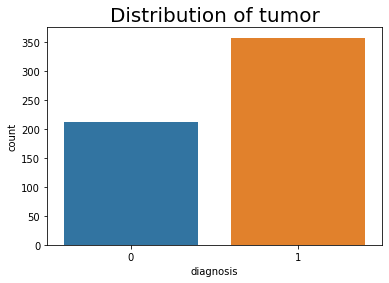

In [151]:
plt.title("Distribution of tumor", fontsize=20)
sns.countplot(x='diagnosis', data = df, label='count'  )

Setting X (input) and Y(output) and splitting them

In [152]:
#Split dataset into dependent(X) and independent(Y) datasets

y = df.diagnosis.values
x = df.drop(['target', 'diagnosis'],axis='columns')

In [153]:
#Splitting data into training and testing dataset

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.3, random_state = 0)

In [154]:
x_train.shape

(398, 5)

In [155]:
x_train.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
478,11.490,14.59,73.99,404.9,0.10460
303,10.490,18.61,66.86,334.3,0.10680
155,12.250,17.94,78.27,460.3,0.08654
186,18.310,18.58,118.60,1041.0,0.08588
101,6.981,13.43,43.79,143.5,0.11700


In [156]:
y_train.shape

(398,)

In [157]:
y_train

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1,

c:\users\prathamesh saraf\appdata\local\programs\python\python36\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='mean_radius', ylabel='count'>

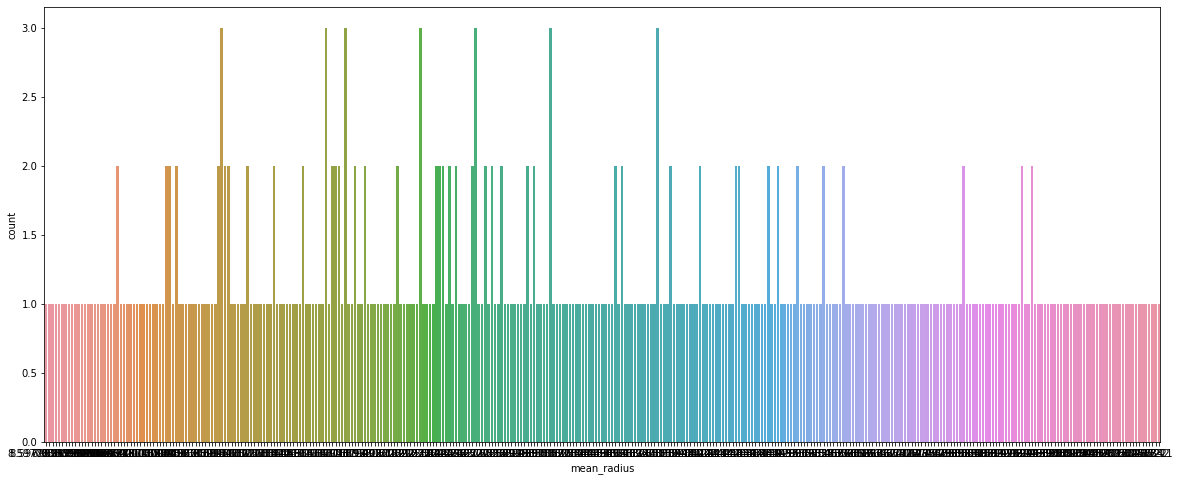

In [158]:
# counter plot of feature mean radius
plt.figure(figsize = (20,8))
sns.countplot(x_train['mean_radius'])

<AxesSubplot:>

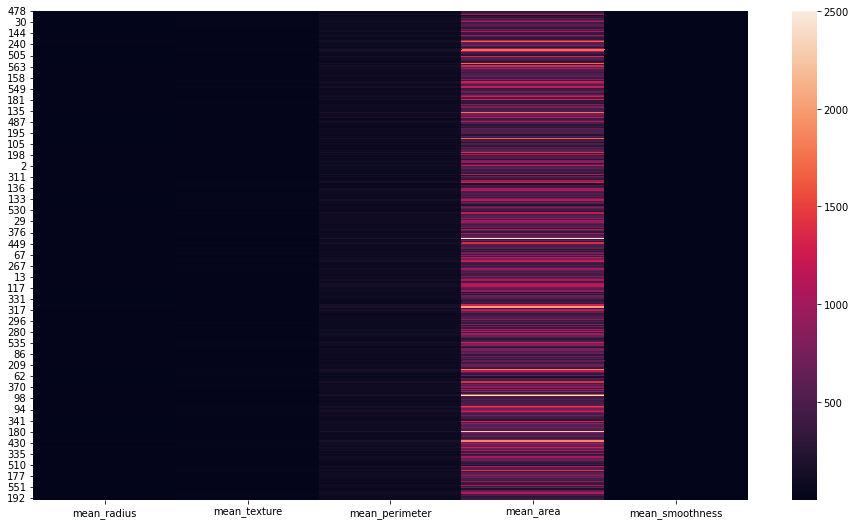

In [159]:
plt.figure(figsize=(16,9))
sns.heatmap(x_train)

In [160]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.transform(x_test)

# Machine Learning Model Building

# Suppor vector Classifier

In [161]:
# Support vector classifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


In [162]:
from sklearn.svm import SVC
m1= SVC()
m1.fit(x_train, y_train)
m1.score(x_test,y_test)

0.8771929824561403

In [163]:
mp1=m1.predict(x_test)
mp1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1], dtype=int64)

In [164]:
data = [[9.465,21.01,60.11,269.4,0.10440],[15.46,19.48,101.70,748.9,0.10920]]
df1 = pd.DataFrame(data, columns = ['mean_radius','mean_texture','mean_perimeter','mean_area','mean_smoothness'])
m1.predict(df1)

array([1, 0], dtype=int64)

# K – Nearest Neighbor Classifier

In [165]:
# K – Nearest Neighbor Classifier
from sklearn.neighbors import KNeighborsClassifier
m2= KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
m2.fit(x_train, y_train)

KNeighborsClassifier()

In [166]:
m2.score(x_test,y_test)

0.9005847953216374

In [167]:
mp2=m2.predict(x_test)
mp2

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1], dtype=int64)

In [168]:
data = [[9.465,21.01,60.11,269.4,0.10440],[15.46,19.48,101.70,748.9,0.10920]]
df2 = pd.DataFrame(data, columns = ['mean_radius','mean_texture','mean_perimeter','mean_area','mean_smoothness'])
m2.predict(df2)

array([1, 0], dtype=int64)

# Naive Bayes Classifier

In [169]:
# Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
m3 = GaussianNB( )
m3.fit(x_train, y_train)

GaussianNB()

In [170]:
m3.score(x_test,y_test)

0.9298245614035088

In [171]:
mp3=m3.predict(x_test)
mp3

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1], dtype=int64)

In [172]:
data = [[13.05,18.59,85.09,512.0,0.10820],[15.46,19.48,101.70,748.9,0.10920]]
df3 = pd.DataFrame(data, columns = ['mean_radius','mean_texture','mean_perimeter','mean_area','mean_smoothness'])
m3.predict(df3)

array([1, 0], dtype=int64)

# Decision Tree Classifier

In [173]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
m4 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
m4.fit(x_train, y_train)


DecisionTreeClassifier(criterion='entropy', random_state=0)

In [174]:
m4.score(x_test,y_test)

0.9005847953216374

In [175]:
mp4=m4.predict(x_test)
mp4

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1], dtype=int64)

In [176]:
data = [[14.250,22.15,96.42,645.7,0.104900],[9.465,22.01,60.11,269.4,0.10440],]
df4 = pd.DataFrame(data, columns = ['mean_radius','mean_texture','mean_perimeter','mean_area','mean_smoothness'])
m4.predict(df4)

array([0, 1], dtype=int64)

# RANDOM FOREST


In [177]:
from sklearn.ensemble import RandomForestClassifier 
m5=RandomForestClassifier(random_state = 0)
m5.fit(x_train,y_train)

RandomForestClassifier(random_state=0)

In [178]:
m5.score(x_test,y_test)

0.9415204678362573

In [179]:
mp5=m5.predict(x_test)
mp5

array([0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1], dtype=int64)

In [180]:
data = [[14.250,22.15,96.42,645.7,0.104900],[9.465,22.01,60.11,269.4,0.10440],]
df5 = pd.DataFrame(data, columns = ['mean_radius','mean_texture','mean_perimeter','mean_area','mean_smoothness'])
m5.predict(df5)

array([0, 1], dtype=int64)

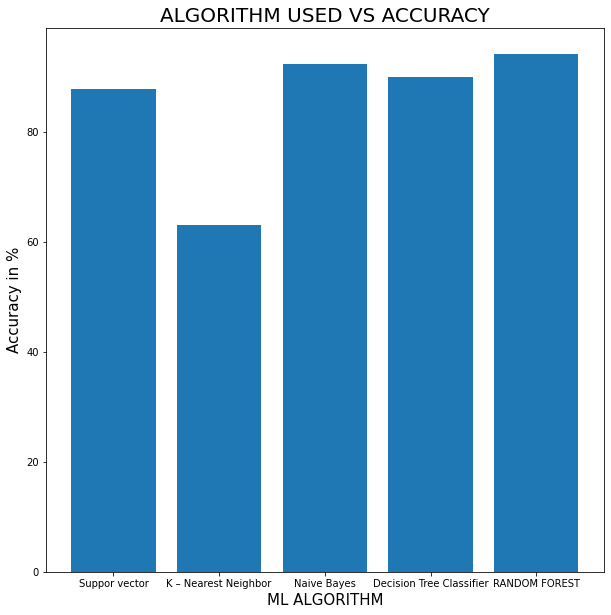

In [181]:
plt.figure(figsize=(10,10))
a=["Suppor vector", "K – Nearest Neighbor", "Naive Bayes", "Decision Tree Classifier","RANDOM FOREST"]
b=[87.71,63.15,92.39,90.05,94.15]
plt.title('ALGORITHM USED VS ACCURACY', fontsize=20)
plt.xlabel("ML ALGORITHM", fontsize=15)
plt.bar (a,b)
plt.ylabel('Accuracy in %', fontsize=15)
plt.show()

# CONFUSION MATRIX

# 1.Suppor vector Classifier CONFUSION MATRIX

In [182]:
from sklearn.metrics import confusion_matrix

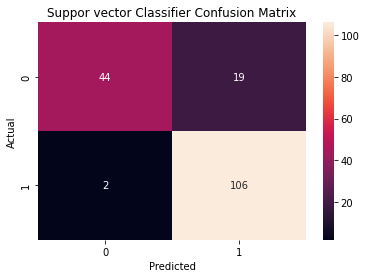

In [183]:
conf_matrix=confusion_matrix(y_test,mp1)
sns.heatmap(conf_matrix, annot=True, fmt=".0f")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Suppor vector Classifier Confusion Matrix")
plt.show() 

# 2.K – Nearest Neighbor Classifier CONFUSION MATRIX

In [184]:
from sklearn.metrics import confusion_matrix

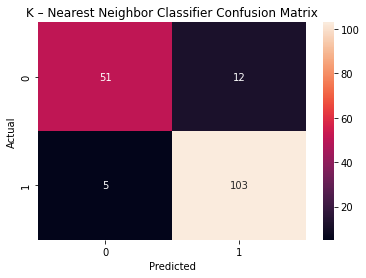

In [185]:
conf_matrix=confusion_matrix(y_test,mp2)
sns.heatmap(conf_matrix, annot=True, fmt=".0f")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("K – Nearest Neighbor Classifier Confusion Matrix")
plt.show() 

# 3.Naive Bayes Classifier CONFUSION MATRIX

In [186]:
from sklearn.metrics import confusion_matrix

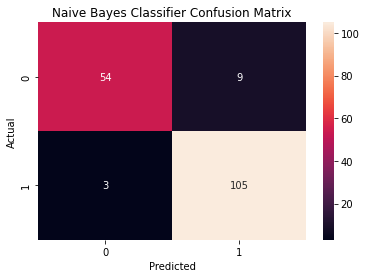

In [187]:
conf_matrix=confusion_matrix(y_test,mp3)
sns.heatmap(conf_matrix, annot=True, fmt=".0f")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Naive Bayes Classifier Confusion Matrix")
plt.show() 

# 4.Decision Tree Classifier CONFUSION MATRIX

In [188]:
from sklearn.metrics import confusion_matrix

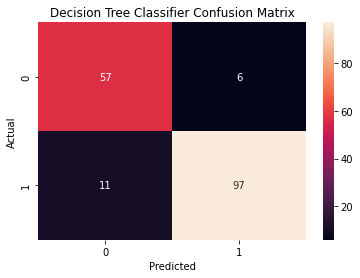

In [189]:
conf_matrix=confusion_matrix(y_test,mp4)
sns.heatmap(conf_matrix, annot=True, fmt=".0f")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Decision Tree Classifier Confusion Matrix")
plt.show() 

# 5.RANDOM FOREST CONFUSION MATRIX


In [190]:
from sklearn.metrics import confusion_matrix

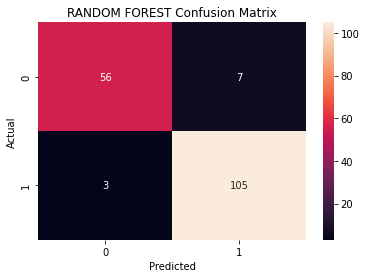

In [191]:
conf_matrix=confusion_matrix(y_test,mp5)
sns.heatmap(conf_matrix, annot=True, fmt=".0f")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("RANDOM FOREST Confusion Matrix")
plt.show() 

# CLASSIFICATION REPORT

# 1.Suppor vector Classifier

In [192]:
report_dt=classification_report(y_test,mp1)
print(report_dt)

              precision    recall  f1-score   support

           0       0.96      0.70      0.81        63
           1       0.85      0.98      0.91       108

    accuracy                           0.88       171
   macro avg       0.90      0.84      0.86       171
weighted avg       0.89      0.88      0.87       171



# 2.K – Nearest Neighbor Classifier

In [193]:
report_dt=classification_report(y_test,mp2)
print(report_dt)

              precision    recall  f1-score   support

           0       0.91      0.81      0.86        63
           1       0.90      0.95      0.92       108

    accuracy                           0.90       171
   macro avg       0.90      0.88      0.89       171
weighted avg       0.90      0.90      0.90       171



# 3.Naive Bayes Classifier

In [194]:
report_dt=classification_report(y_test,mp3)
print(report_dt)

              precision    recall  f1-score   support

           0       0.95      0.86      0.90        63
           1       0.92      0.97      0.95       108

    accuracy                           0.93       171
   macro avg       0.93      0.91      0.92       171
weighted avg       0.93      0.93      0.93       171



 # 4.Decision Tree Classifier

In [195]:
report_dt=classification_report(y_test,mp4)
print(report_dt)

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        63
           1       0.94      0.90      0.92       108

    accuracy                           0.90       171
   macro avg       0.89      0.90      0.89       171
weighted avg       0.90      0.90      0.90       171



# 5.RANDOM FOREST 

In [196]:
report_dt=classification_report(y_test,mp4)
print(report_dt)

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        63
           1       0.94      0.90      0.92       108

    accuracy                           0.90       171
   macro avg       0.89      0.90      0.89       171
weighted avg       0.90      0.90      0.90       171

